In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 从 Excel 文件中读取数据
df = pd.read_excel('消费数据.xlsx')
columns_to_drop = ['省份']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,食品,衣着,家庭设备,医疗,交通,娱乐,居住,杂项
0,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
1,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
2,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
3,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
4,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96


In [3]:
# 计算相关系数矩阵
correlation_matrix = np.corrcoef(df, rowvar=False)
correlation_matrix

array([[ 1.        ,  0.24733541,  0.6978291 ,  0.46776442,  0.82784056,
         0.76863952,  0.67002431,  0.87720022],
       [ 0.24733541,  1.        ,  0.25785302,  0.4232989 ,  0.08589674,
         0.25518521, -0.20114823,  0.34927349],
       [ 0.6978291 ,  0.25785302,  1.        ,  0.62080095,  0.58531622,
         0.85642718,  0.56859444,  0.66742491],
       [ 0.46776442,  0.4232989 ,  0.62080095,  1.        ,  0.53125636,
         0.68361159,  0.31397453,  0.62822238],
       [ 0.82784056,  0.08589674,  0.58531622,  0.53125636,  1.        ,
         0.70812343,  0.80042554,  0.7762909 ],
       [ 0.76863952,  0.25518521,  0.85642718,  0.68361159,  0.70812343,
         1.        ,  0.64720094,  0.74488694],
       [ 0.67002431, -0.20114823,  0.56859444,  0.31397453,  0.80042554,
         0.64720094,  1.        ,  0.52503273],
       [ 0.87720022,  0.34927349,  0.66742491,  0.62822238,  0.7762909 ,
         0.74488694,  0.52503273,  1.        ]])

In [4]:
# 获取特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
# print(eigenvalues)
# print(-eigenvectors.T)
# 计算贡献率
variance_explained_ratio = eigenvalues / np.sum(eigenvalues)
print(variance_explained_ratio)
# 计算累积贡献率
cumulative_variance_explained_ratio = np.cumsum(variance_explained_ratio)
print(cumulative_variance_explained_ratio)

[0.63721252 0.16903311 0.07184047 0.05078642 0.0351585  0.00909967
 0.0152846  0.01158471]
[0.63721252 0.80624563 0.87808609 0.92887251 0.96403102 0.97313069
 0.98841529 1.        ]


[418532.73314284  26456.48019833]
[[ 0.901748    0.04597374  0.21020759  0.06987108  0.16872219  0.24173483
   0.18500909  0.12056734]
 [ 0.3759619  -0.07214027 -0.63252803 -0.27186386 -0.03116046 -0.58389649
  -0.19331114 -0.01309496]]
[[1186.14569459 -297.34444542]
 [ 568.92860144 -151.14014681]
 [-472.44884156 -142.67982959]
 [-630.29065076  -15.48914839]
 [-710.3736669   -61.19258051]
 [-321.41238361   81.30929083]
 [-486.64795744   54.8038875 ]
 [-642.81332301   29.69955678]
 [1905.06125115  -33.30943458]
 [ 240.92855238  -23.46337071]
 [ 788.68140715 -166.56699854]
 [-216.10591498  122.62938312]
 [ 643.42740545  380.21578272]
 [-482.98830486   87.81366601]
 [-252.33025066 -219.25671089]
 [-609.3712732    15.07748004]
 [   6.97429304  -95.79368372]
 [-194.42366486  -35.49519491]
 [1305.95856835  -44.54433191]
 [  62.87467695   32.40899081]
 [ -26.55772635  268.43288013]
 [ 374.17256879  -57.83168756]
 [ -31.49996042   39.05898059]
 [-332.90406895  -37.30428751]
 [ 190.65958535  10

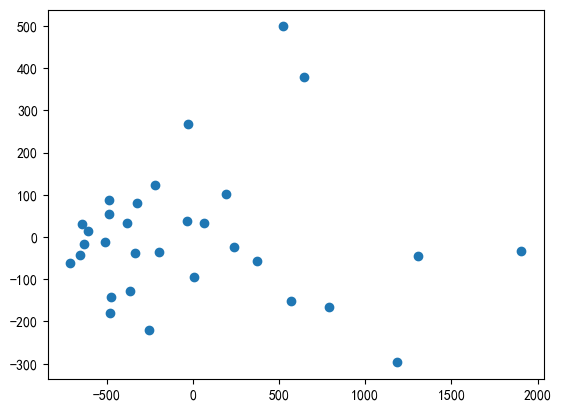

In [5]:
# 根据各个特征的贡献率和累积贡献率，这里选择前两个特征作为主成分
# 使用 PCA 对相关系数矩阵进行降维
pca = PCA(n_components=2)
pca.fit(df)
# 输出特征值
print(pca.explained_variance_)
# 输出特征向量
print(pca.components_)
# 降维后的数据
X_new = pca.transform(df)
print(X_new)
# 绘制散点图
fig = plt.figure()
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o')
plt.show()